In [1]:

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN
from keras.datasets import imdb
from keras.callbacks import TensorBoard
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
max_features = 50000
no_classes = 1
max_length = 100
batch_size = 64
embedding_size = 64
dropout_rate = 0.5
hidden_layer_size = 250
no_epochs = 20

In [24]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print('Data loaded successfully.')
print('# Train Data = ', len(x_train))
print('# Test Data = ', len(x_test))

Data loaded successfully.
# Train Data =  25000
# Test Data =  25000


In [25]:
print('Preprocessing Data..')
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

Preprocessing Data..


In [26]:
RNN_model = Sequential()
# Add Embedding layer
RNN_model.add(Embedding(max_features, embedding_size, input_length=max_length))
RNN_model.add(Dropout(dropout_rate))
# Add Simple RNN layer
RNN_model.add(SimpleRNN(25, input_shape=(3, 1)))

# Add Dense Hidden Layer
RNN_model.add(Dense(hidden_layer_size, activation='relu'))
RNN_model.add(Dropout(dropout_rate))
# Output Layer
RNN_model.add(Dense(no_classes, activation='sigmoid'))

# Configure model
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
tensorboard = TensorBoard('./logs/SimpleRNN')

# Train!
print('Training the model..')
RNN_model.fit(x_train, y_train, batch_size=batch_size, verbose=2, epochs=no_epochs, validation_data=(x_test, y_test), callbacks = [tensorboard])

Training the model..
Epoch 1/20
391/391 - 27s - 69ms/step - accuracy: 0.7261 - loss: 0.5129 - val_accuracy: 0.8357 - val_loss: 0.3809
Epoch 2/20
391/391 - 23s - 59ms/step - accuracy: 0.8793 - loss: 0.3006 - val_accuracy: 0.8404 - val_loss: 0.3752
Epoch 3/20
391/391 - 21s - 55ms/step - accuracy: 0.9217 - loss: 0.2134 - val_accuracy: 0.8396 - val_loss: 0.4042
Epoch 4/20
391/391 - 22s - 57ms/step - accuracy: 0.9437 - loss: 0.1567 - val_accuracy: 0.8366 - val_loss: 0.4601
Epoch 5/20
391/391 - 23s - 58ms/step - accuracy: 0.9624 - loss: 0.1083 - val_accuracy: 0.8290 - val_loss: 0.5358
Epoch 6/20
391/391 - 22s - 56ms/step - accuracy: 0.9710 - loss: 0.0828 - val_accuracy: 0.8198 - val_loss: 0.7327
Epoch 7/20
391/391 - 23s - 58ms/step - accuracy: 0.9732 - loss: 0.0758 - val_accuracy: 0.8122 - val_loss: 0.7465
Epoch 8/20
391/391 - 24s - 60ms/step - accuracy: 0.9778 - loss: 0.0610 - val_accuracy: 0.8226 - val_loss: 0.7632
Epoch 9/20
391/391 - 23s - 59ms/step - accuracy: 0.9844 - loss: 0.0462 - va

In [28]:
y_predict=RNN_model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [29]:
loss, accuracy = RNN_model.evaluate(x_test, y_test, batch_size=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 178s 7ms/step - accuracy: 0.8128 - loss: 1.0301
Test Loss: 1.0302555561065674
Test Accuracy: 0.8124399781227112


In [30]:
import numpy as np
y_pred_classes = np.argmax(y_predict, axis=1)

# Si vos y_test sont one-hot, convertir en entiers :
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

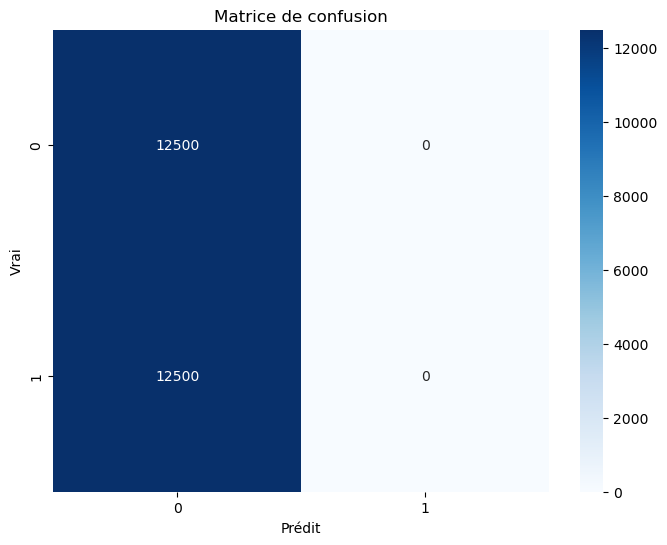

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12500
           1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print(classification_report(y_test_classes, y_pred_classes))

In [34]:
from keras.preprocessing.sequence import pad_sequences

def encode_text(text, word_index, maxlen=500):
    # Nettoyage simple (optionnel mais conseillé)
    text = text.lower().replace(",", "").replace(".", "").replace("(", "").replace(")", "").replace("'", "").split()

    # Convertir les mots en indices IMDB (on ajoute +3 car Keras réserve 0=padding, 1=start, 2=unk, 3=unused)
    encoded = []
    for word in text:
        index = word_index.get(word)
        if index is not None and index < max_features:
            encoded.append(index + 3)
        else:
            encoded.append(2)  # 2 = token "unknown"

    # Appliquer le même padding que pour les données IMDB
    return pad_sequences([encoded], maxlen=maxlen)

In [35]:
word_index = imdb.get_word_index()
sample_text = "Terrible pacing, awful script, and unwatchable performances."
encoded_sample = encode_text(sample_text, word_index, maxlen=500)

In [36]:
prediction = RNN_model.predict(encoded_sample)
print(f"Probabilité de critique positive : {prediction[0][0]:.4f}")

# Si seuil classique de 0.5
result = 1 if prediction[0][0] >= 0.5 else 0
print(f"Prédiction finale : {'Positive' if result == 1 else 'Négative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
Probabilité de critique positive : 0.0000
Prédiction finale : Négative


In [37]:
RNN_model.save('RNN_ml2.keras')